In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [161]:
cola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<Axes: >

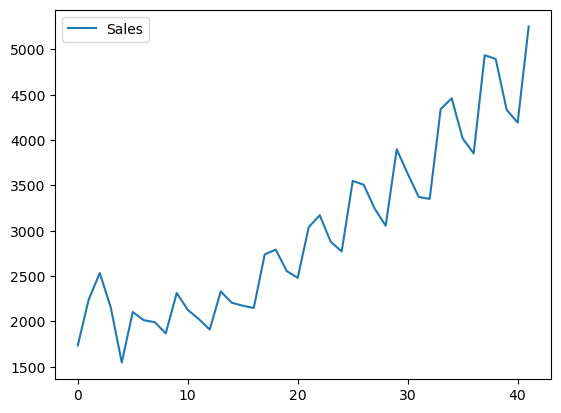

In [162]:
cola.plot()

<Axes: ylabel='Density'>

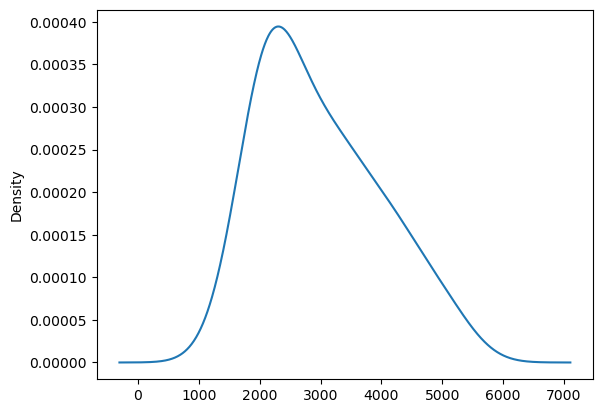

In [163]:
# create a density plot
cola.Sales.plot(kind='kde')

<Axes: >

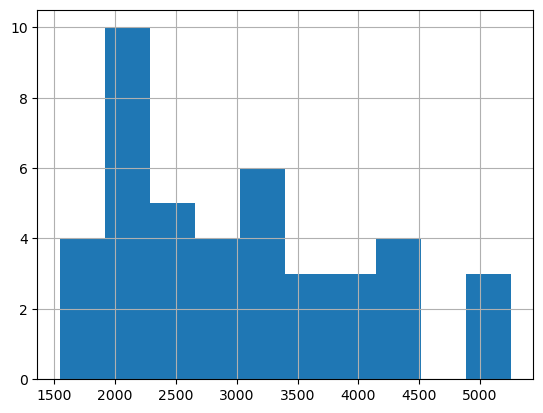

In [164]:
# create a histogram plot
cola.Sales.hist()


# Lag plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

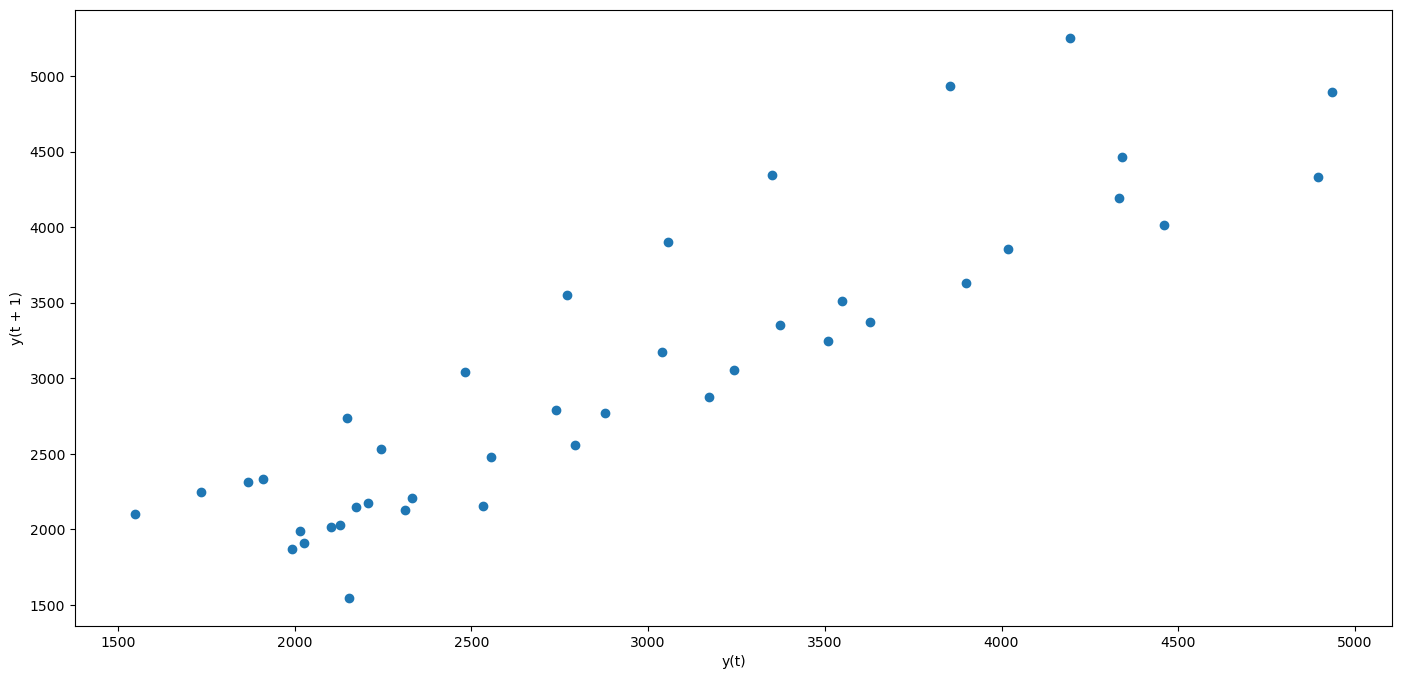

In [165]:
plt.figure(figsize=(17,8))
pd.plotting.lag_plot(cola['Sales'])

# ACF Plot

<Figure size 1200x1200 with 0 Axes>

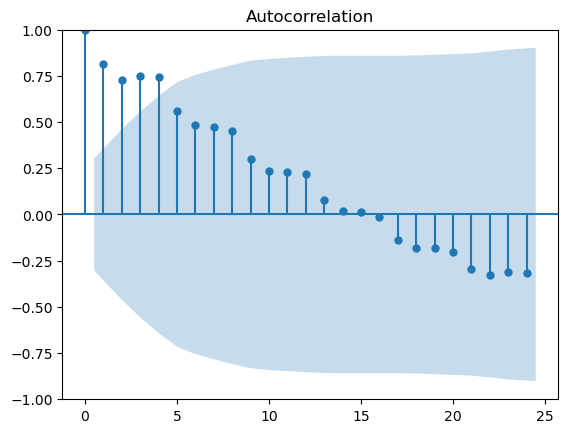

In [166]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (12,12))
plot_acf(cola['Sales'], lags=24)
plt.show()


<Axes: xlabel='Sales', ylabel='Density'>

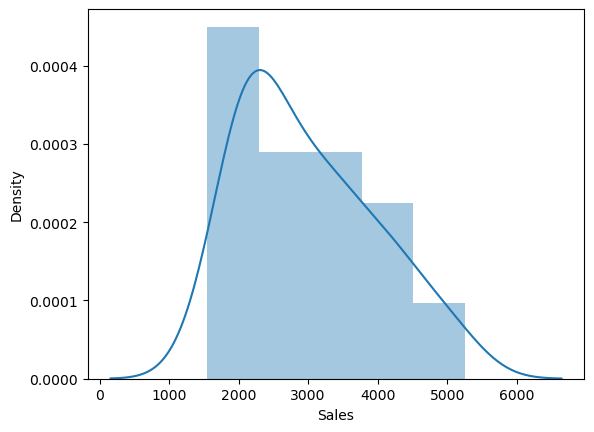

In [167]:
sns.distplot(cola['Sales'])

In [168]:
t = np.arange(1,43)
t =pd.DataFrame(t) 
t

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [169]:
cola['t'] = t
cola

,Quarter,Sales,t
0,Q1_86,1734.827000,1
1,Q2_86,2244.960999,2
2,Q3_86,2533.804993,3
3,Q4_86,2154.962997,4
4,Q1_87,1547.818996,5
5,Q2_87,2104.411995,6
6,Q3_87,2014.362999,7
7,Q4_87,1991.746998,8
8,Q1_88,1869.049999,9
9,Q2_88,2313.631996,10


In [170]:
t_square = np.square(t)
cola['t_square'] = t_square
cola

,Quarter,Sales,t,t_square
0,Q1_86,1734.827000,1,1
1,Q2_86,2244.960999,2,4
2,Q3_86,2533.804993,3,9
3,Q4_86,2154.962997,4,16
4,Q1_87,1547.818996,5,25
5,Q2_87,2104.411995,6,36
6,Q3_87,2014.362999,7,49
7,Q4_87,1991.746998,8,64
8,Q1_88,1869.049999,9,81
9,Q2_88,2313.631996,10,100


In [171]:
log_sales = np.log(cola.Sales)
cola['log_sales'] = log_sales
cola.head()

,Quarter,Sales,t,t_square,log_sales
0,Q1_86,1734.827000,1,1,7.458663
1,Q2_86,2244.960999,2,4,7.716443
2,Q3_86,2533.804993,3,9,7.837477
3,Q4_86,2154.962997,4,16,7.675529
4,Q1_87,1547.818996,5,25,7.344602


In [172]:
cola['Quarters'] = cola['Quarter'].str.extract('([Qq]\d)')
cola

,Quarter,Sales,t,t_square,log_sales,Quarters
0,Q1_86,1734.827000,1,1,7.458663,Q1
1,Q2_86,2244.960999,2,4,7.716443,Q2
2,Q3_86,2533.804993,3,9,7.837477,Q3
3,Q4_86,2154.962997,4,16,7.675529,Q4
4,Q1_87,1547.818996,5,25,7.344602,Q1
5,Q2_87,2104.411995,6,36,7.651791,Q2
6,Q3_87,2014.362999,7,49,7.608058,Q3
7,Q4_87,1991.746998,8,64,7.596767,Q4
8,Q1_88,1869.049999,9,81,7.533186,Q1
9,Q2_88,2313.631996,10,100,7.746574,Q2


In [173]:
dummies = pd.get_dummies(cola['Quarters'])
dummies = pd.DataFrame(dummies)
dummies

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [174]:
df = pd.concat((cola, dummies), axis=1)
df.head()

,Quarter,Sales,t,t_square,log_sales,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,1,7.458663,Q1,1,0,0,0
1,Q2_86,2244.960999,2,4,7.716443,Q2,0,1,0,0
2,Q3_86,2533.804993,3,9,7.837477,Q3,0,0,1,0
3,Q4_86,2154.962997,4,16,7.675529,Q4,0,0,0,1
4,Q1_87,1547.818996,5,25,7.344602,Q1,1,0,0,0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quarter    42 non-null     object 
 1   Sales      42 non-null     float64
 2   t          42 non-null     int32  
 3   t_square   42 non-null     int32  
 4   log_sales  42 non-null     float64
 5   Quarters   42 non-null     object 
 6   Q1         42 non-null     uint8  
 7   Q2         42 non-null     uint8  
 8   Q3         42 non-null     uint8  
 9   Q4         42 non-null     uint8  
dtypes: float64(2), int32(2), object(2), uint8(4)
memory usage: 1.9+ KB


<Axes: xlabel='Quarters', ylabel='Sales'>

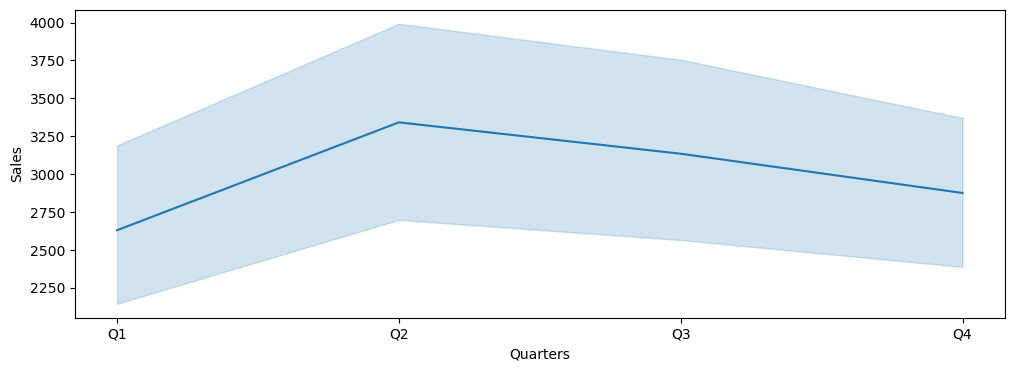

In [176]:
plt.figure(figsize=(12,4))
sns.lineplot(x="Quarters",y="Sales",data=df)

# Splitting data

In [177]:
Train = df.head(35)
Train

,Quarter,Sales,t,t_square,log_sales,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,1,7.458663,Q1,1,0,0,0
1,Q2_86,2244.960999,2,4,7.716443,Q2,0,1,0,0
2,Q3_86,2533.804993,3,9,7.837477,Q3,0,0,1,0
3,Q4_86,2154.962997,4,16,7.675529,Q4,0,0,0,1
4,Q1_87,1547.818996,5,25,7.344602,Q1,1,0,0,0
5,Q2_87,2104.411995,6,36,7.651791,Q2,0,1,0,0
6,Q3_87,2014.362999,7,49,7.608058,Q3,0,0,1,0
7,Q4_87,1991.746998,8,64,7.596767,Q4,0,0,0,1
8,Q1_88,1869.049999,9,81,7.533186,Q1,1,0,0,0
9,Q2_88,2313.631996,10,100,7.746574,Q2,0,1,0,0


In [178]:
Test = df.tail(7)
Test

,Quarter,Sales,t,t_square,log_sales,Quarters,Q1,Q2,Q3,Q4
35,Q4_94,4017.0,36,1296,8.298291,Q4,0,0,0,1
36,Q1_95,3854.0,37,1369,8.256867,Q1,1,0,0,0
37,Q2_95,4936.0,38,1444,8.504311,Q2,0,1,0,0
38,Q3_95,4895.0,39,1521,8.495970,Q3,0,0,1,0
39,Q4_95,4333.0,40,1600,8.374015,Q4,0,0,0,1
40,Q1_96,4194.0,41,1681,8.341410,Q1,1,0,0,0
41,Q2_96,5253.0,42,1764,8.566555,Q2,0,1,0,0


# Time series decomposition plot

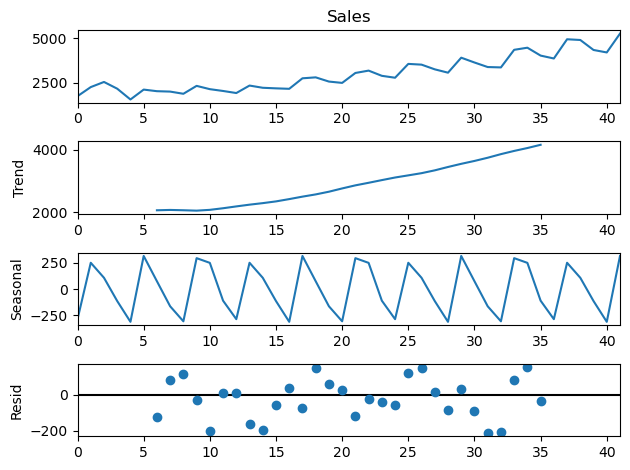

In [179]:
decompose_ts_add = seasonal_decompose(cola['Sales'], period = 12)
decompose_ts_add.plot()
plt.show()

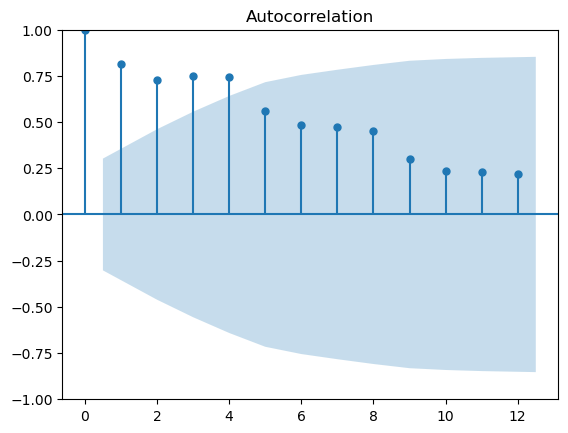

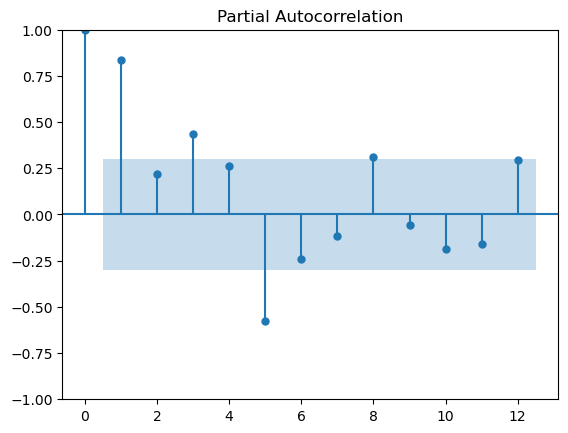

In [180]:
# ACF and PCF plot
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cola.Sales,lags=12)
tsa_plots.plot_pacf(cola.Sales,lags=12)
plt.show()


In [181]:
#Linear Model
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales']))-np.array(pred_linear))**2)
rmse_linear,MAPE(pred_linear,Test.Sales)

(465.8922910898691, 9.841148762814573)

In [182]:
#Exponential

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp,MAPE(np.exp(pred_Exp),Test.Sales)


(493.348648484222, 7.984983007915885)

In [183]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad,MAPE(pred_Quad,Test.Sales)

(511.81173194173283, 9.913281608384157)

In [184]:
#Additive seasonality 
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea,MAPE(pred_add_sea,Test.Sales)

(1861.870416425175, 40.88449297547034)

In [185]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['t','t_square','Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad,MAPE(pred_add_sea_quad,Test.Sales)


(309.4641395163693, 5.936692552032322)

In [186]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea,MAPE(np.exp(pred_Mult_sea),Test.Sales)

(1938.9332351966193, 42.56003656979792)

In [187]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test[['t','Q1','Q2', 'Q3', 'Q4']]))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea,MAPE(np.exp(pred_Mult_sea),Test.Sales)

(339.1874666994836, 42.56003656979792)

In [188]:
#Multiplicative quadratic Seasonality 

Mul_Quad_Add_sea = smf.ols('log_sales~t+t_square+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_quad_sea = pd.Series(Mul_Quad_Add_sea.predict(Test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_quad_sea)))**2))
rmse_Mult_add_sea,MAPE(np.exp(pred_Mult_quad_sea),Test.Sales)

(673.411623571175, 12.936375469659538)

In [189]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}

In [190]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,309.464140
0,rmse_linear,465.892291
1,rmse_Exp,493.348648
2,rmse_Quad,511.811732
6,rmse_Mult_add_sea,673.411624
3,rmse_add_sea,1861.870416
5,rmse_Mult_sea,1938.933235


In [191]:
predicted_sales = add_sea_Quad.predict(Test)

In [192]:
preds = pd.DataFrame(predicted_sales)
preds

,0
35,4197.333511
36,4120.453583
37,4840.142044
38,4914.214728
39,4795.942579
40,4736.501477
41,5473.628762


In [193]:
new_var = pd.concat([Train,preds])

In [194]:
new_var

,Quarter,Sales,t,t_square,log_sales,Quarters,Q1,Q2,Q3,Q4,0
0,Q1_86,1734.827000,1.0,1.0,7.458663,Q1,1.0,0.0,0.0,0.0,NaN
1,Q2_86,2244.960999,2.0,4.0,7.716443,Q2,0.0,1.0,0.0,0.0,NaN
2,Q3_86,2533.804993,3.0,9.0,7.837477,Q3,0.0,0.0,1.0,0.0,NaN
3,Q4_86,2154.962997,4.0,16.0,7.675529,Q4,0.0,0.0,0.0,1.0,NaN
4,Q1_87,1547.818996,5.0,25.0,7.344602,Q1,1.0,0.0,0.0,0.0,NaN
5,Q2_87,2104.411995,6.0,36.0,7.651791,Q2,0.0,1.0,0.0,0.0,NaN
6,Q3_87,2014.362999,7.0,49.0,7.608058,Q3,0.0,0.0,1.0,0.0,NaN
7,Q4_87,1991.746998,8.0,64.0,7.596767,Q4,0.0,0.0,0.0,1.0,NaN
8,Q1_88,1869.049999,9.0,81.0,7.533186,Q1,1.0,0.0,0.0,0.0,NaN
9,Q2_88,2313.631996,10.0,100.0,7.746574,Q2,0.0,1.0,0.0,0.0,NaN


<Axes: >

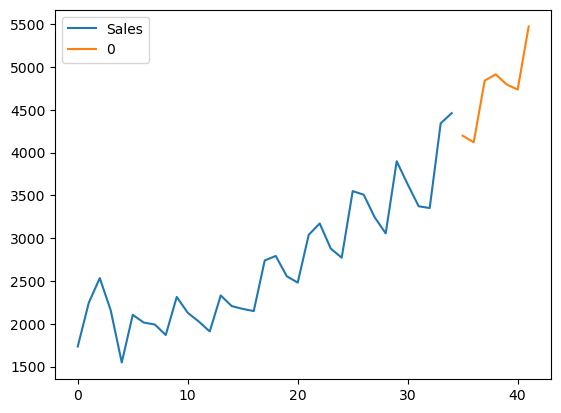

In [195]:
new_var[['Sales',0]].reset_index(drop=True).plot()

In [196]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [197]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

16.401824825484095

# Holt method

In [198]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

15.891434466049121

# Holts winter exponential smoothing with additive seasonality and additive trend

In [213]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="mul",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)


5.414092453027744

# Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [214]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

3.4675226582209278

In [207]:
hwe_model_mul_add = ExponentialSmoothing(cola["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [215]:
#Forecasting for next 7 time periods
final_preds = hwe_model_mul_add.forecast(7)
final_preds = pd.DataFrame(final_preds)
final_preds['Final_Pred'] = final_preds

In [216]:
final_model = pd.concat([Train,final_preds])
final_model.drop(columns=0)

,Quarter,Sales,t,t_square,log_sales,Quarters,Q1,Q2,Q3,Q4,Final_Pred
0,Q1_86,1734.827000,1.0,1.0,7.458663,Q1,1.0,0.0,0.0,0.0,NaN
1,Q2_86,2244.960999,2.0,4.0,7.716443,Q2,0.0,1.0,0.0,0.0,NaN
2,Q3_86,2533.804993,3.0,9.0,7.837477,Q3,0.0,0.0,1.0,0.0,NaN
3,Q4_86,2154.962997,4.0,16.0,7.675529,Q4,0.0,0.0,0.0,1.0,NaN
4,Q1_87,1547.818996,5.0,25.0,7.344602,Q1,1.0,0.0,0.0,0.0,NaN
5,Q2_87,2104.411995,6.0,36.0,7.651791,Q2,0.0,1.0,0.0,0.0,NaN
6,Q3_87,2014.362999,7.0,49.0,7.608058,Q3,0.0,0.0,1.0,0.0,NaN
7,Q4_87,1991.746998,8.0,64.0,7.596767,Q4,0.0,0.0,0.0,1.0,NaN
8,Q1_88,1869.049999,9.0,81.0,7.533186,Q1,1.0,0.0,0.0,0.0,NaN
9,Q2_88,2313.631996,10.0,100.0,7.746574,Q2,0.0,1.0,0.0,0.0,NaN


<Axes: >

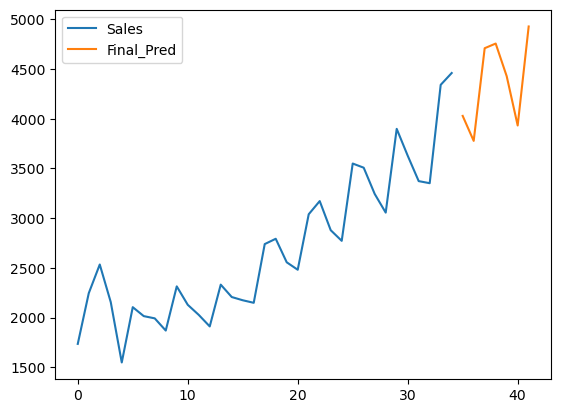

In [217]:
final_model[['Sales','Final_Pred']].reset_index(drop=True).plot()

In [218]:
# We got the best model by using Holts winter exponential smoothing with multiplicative seasonality and additive trend.